<a href="https://colab.research.google.com/github/Raf888-sr/ML/blob/Netflix-EDA/rns53_rafic_srouji_assign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part-I Exploratory Data Analysis
## Investigating Netflix Movies and TV Shows

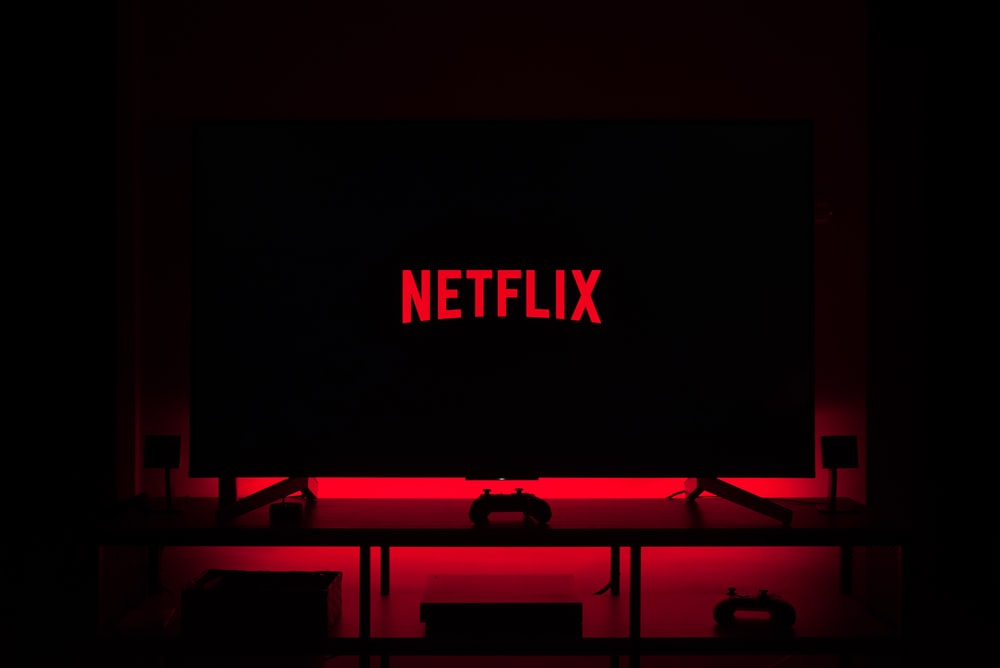




Netflix! What started in 1997 as a DVD rental service has since exploded into the largest entertainment/media company by [market capitalization](https://www.marketwatch.com/story/netflix-shares-close-up-8-for-yet-another-record-high-2020-07-10), boasting over 200 million subscribers as of [January 2021](https://www.cbsnews.com/news/netflix-tops-200-million-subscribers-but-faces-growing-challenge-from-disney-plus/).

The dataset was taken from [Kaggle](https://www.kaggle.com/shivamb/netflix-shows), and it contains the following fields:

* **show_id**: A code that is unique to each movie/TV show in the dataset. ***This column is critical, and a missing value indicates the set is a duplicate or invalid!***
* **type**: Movie or a TV show.
* **title**: Name of the movie or TV show.
* **director**: The person who controls a film's artistic and dramatic aspects and visualizes the screenplay (or script) while guiding the film crew and actors in the fulfilment of that vision.
* **cast**: Actors/Actresses involved in the movie or TV show.
* **country**: The origin of the movie or TV show.
* **date_added**: The date the record has been added to Netflix.
* **release_year**: The year the move/TV show was released.
* **rating**: The film suitability for certain audiences based on the content. Ratings are set according to the [Motion Picture Association(MPA)](https://en.wikipedia.org/wiki/Motion_Picture_Association_film_rating_system#:~:text=Rated%20G%3A%20General%20audiences%20%E2%80%93%20All,accompanying%20parent%20or%20adult%20guardian.).
* **duration**: The length of movie/TV show. Movies are measured in minutes while TV shows by number of seasons.
* **listed_in**: The genres each movie/TV show belongs to.
* **description**: A short summary describing the plot of the movie/TV show.

## Importing Necessary Libraries

In [ ]:
from google.colab import data_table,drive # Enable interactive dataframes
data_table.enable_dataframe_formatter()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import datetime as dt

# Install using imdbpy. Used for grabbing data for titles with missing features
#import imdb 

### Loading DataFrame from Google Drive

In [ ]:
nfx_df = pd.read_csv("/content/drive/MyDrive/datasets/netflix_titles.csv",parse_dates=['date_added']) #parse_dates for changing type of column to datetime
nfx_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Data Cleaning

In [ ]:
# Remove unecessary columns
nfx_df.drop(columns=['director','cast','description'],axis=1,inplace=True)

In [ ]:
nfx_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [ ]:
# Discover data types and and number of non-null values for each column
nfx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   country       7976 non-null   object        
 4   date_added    8797 non-null   datetime64[ns]
 5   release_year  8807 non-null   int64         
 6   rating        8803 non-null   object        
 7   duration      8804 non-null   object        
 8   listed_in     8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 619.4+ KB


In [ ]:
# Number of Null values
nfx_df.isnull().sum()

show_id           0
type              0
title             0
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
dtype: int64

#### Drop null values from ***date_added*** column

In [ ]:
nfx_df.dropna(subset=['date_added'],inplace=True)
nfx_df.reset_index(drop=True,inplace=True)
nfx_df.shape

(8797, 9)

#### Replacing NaN Values for ***country*** Column

In [ ]:
null_country = nfx_df[nfx_df['country'].isnull()]
null_country.reset_index(drop=True,inplace=True)

In [ ]:
null_country.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
0,s3,TV Show,Ganglands,NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
1,s4,TV Show,Jailbirds New Orleans,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
2,s6,TV Show,Midnight Mass,NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s7,Movie,My Little Pony: A New Generation,NaN,2021-09-24,2021,PG,91 min,Children & Family Movies
4,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S..."


The below commented code chunks were used to extract country origin of titles with missing values from **IMdB**. Exexcution of the code takes nearly 25 mins, so converting the retrieved dictionary and saving it as **JSON** file is recommended approach to save time.

In [ ]:
# Grabbing the title of movie/TV show from null_country dataframe
# movie_show = []
# for i in range (len(null_country)):
 # movie_show.append(null_country['title'][i])

# Creating an instant object belonging to class IMDb 
#moviesDB = imdb.IMDb()
#countries = []

#for i in movie_show:
 # mv = moviesDB.search_movie(i)
 # if len(mv) != 0 :
    # Grab the id of first movie/show from search query
     # id = mv[0].getID() 
      # Grab details of the movie/show
     # mv_info = moviesDB.get_movie(id)
      # if key 'countries' is in mv_info dictionary, get the value
     # if 'countries' in mv_info.keys():
        # countries.append(mv_info['country'][0])
     # else:
         # countries.append('Unavailable')
  # if key 'countries' has no value, add 'Unavailable' to the list
 # else:
   # countries.append('Unavailable')
 

In [ ]:
# Checking whether all records from null_countries table have been taken
# len(countries) == null_country.shape[0]
# title_country = dict(zip(movie_show,countries))
# with open("/content/drive/MyDrive/datasets/assign1.json","w") as outfile:
  # json.dump(title_country,outfile)

#### Reading **JSON** file from URL and converting it to dictionary

I uplaoded the json file on github to easily access the file and substitute the movies with missing countries.

In [ ]:
type(title_country)

dict

In [ ]:
import requests
url = "https://raw.githubusercontent.com/Raf888-sr/ML/main/assign1.json"
response = requests.get(url)
title_country = json.loads(response.text) # Convert Json string to a dictionary
def substitute_na(df,col1,col2,dty):
  """ Substitute the value of a column if it matches one of keys of a dictionary.

  Args:
    df : dataframe
    col1 : column of the dataframe to see if there is matching between its values
           and dictionary keys.
    col2 : column of the dataframe which its values will be replaced by the values of
          the matching keys.
    dty : dictionary

  """

  for i in range(len(df)):
    if df.loc[i,col1] in dty.keys():
      df.loc[i,col2] = dty[df[col1][i]]

substitute_na(nfx_df,'title','country',title_country)

In [ ]:
display(nfx_df['country'].value_counts())
display(nfx_df['country'].isnull().sum())

United States                             2992
India                                     1017
United Kingdom                             450
Unavailable                                301
Japan                                      280
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 755, dtype: int64

0

In [ ]:
# Drop columns with Unavailable values
nfx_df.drop(nfx_df.loc[nfx_df['country'] == 'Unavailable'].index, inplace = True)

In [ ]:
nfx_df.shape

(8496, 9)

#### Replacing multinational films with first country in the list using **lambda** function

In [ ]:
nfx_df['country'] = nfx_df['country'].apply(lambda x: x.split(",")[0] if x.find(",") else x)

##### Rechecking number of null values for each column

In [ ]:
nfx_df.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          3
duration        3
listed_in       0
dtype: int64

#### Replacing Null Values for **rating** column

In [ ]:
nfx_df[nfx_df['rating'].isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
6823,s6828,TV Show,Gargantia on the Verdurous Planet,Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows"
7305,s7313,TV Show,Little Lunch,Australia,2018-02-01,2015,NaN,1 Season,"Kids' TV, TV Comedies"
7529,s7538,Movie,My Honor Was Loyalty,Italy,2017-03-01,2015,NaN,115 min,Dramas


In [ ]:
# MPA ratings taken from IMdB website
nfx_df.loc[nfx_df['rating'].isnull(),'rating'] = 'TV-14','TV-MA','PG-13'

#### Replacing Null values for **duration** column

In [ ]:
nfx_df[nfx_df['duration'].isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
5541,s5542,Movie,Louis C.K. 2017,United States,2017-04-04,2017,74 min,NaN,Movies
5794,s5795,Movie,Louis C.K.: Hilarious,United States,2016-09-16,2010,84 min,NaN,Movies
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,United States,2016-08-15,2015,66 min,NaN,Movies


 Looking at the above observations, the ***rating*** column has values in minutes and which belongs to the duration column

In [ ]:
nfx_df.loc[nfx_df['duration'].isnull(),'duration'] = nfx_df.loc[nfx_df['duration'].isnull(),'rating']

In [ ]:
# Replacing rating columns
nfx_df.loc[nfx_df['title'].str.contains('Louis C.K.'),'rating'] = 'TV-MA'

In [ ]:
nfx_df['show_id'].duplicated().any()

False

In [ ]:
nfx_df.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [ ]:
nfx_df.reset_index(inplace=True,drop=True)

In [ ]:
# Remove min from duration column
nfx_df['duration'] = nfx_df['duration'].apply(lambda x: x.split(" min")[0] if x.find("min") else x)

In [ ]:
nfx_df[nfx_df['type']=='Movie']

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90,Documentaries
6,s7,Movie,My Little Pony: A New Generation,United States,2021-09-24,2021,PG,91,Children & Family Movies
7,s8,Movie,Sankofa,United States,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies"
9,s10,Movie,The Starling,United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas"
12,s13,Movie,Je Suis Karl,Germany,2021-09-23,2021,TV-MA,127,"Dramas, International Movies"
...,...,...,...,...,...,...,...,...,...
8491,s8802,Movie,Zinzana,United Arab Emirates,2016-03-09,2015,TV-MA,96,"Dramas, International Movies, Thrillers"
8492,s8803,Movie,Zodiac,United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers"
8493,s8805,Movie,Zombieland,United States,2019-11-01,2009,R,88,"Comedies, Horror Movies"
8494,s8806,Movie,Zoom,United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies"


#### Get first element of genres from ***listed_in*** column

In [ ]:
for i in range(len(nfx_df)):
  if nfx_df['listed_in'][i].find(","):
    nfx_df.loc[i,'listed_in']= nfx_df['listed_in'][i].split(",")[0]

#### Check for duplicates

In [ ]:
nfx_df.duplicated().any()

False

#### Change format of ***date_added*** column

In [ ]:
nfx_df['date_added'] = pd.to_datetime(nfx_df['date_added']).dt.date

In [ ]:
nfx_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90,Documentaries
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows
2,s3,TV Show,Ganglands,France,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,United States,2021-09-24,2021,TV-MA,1 Season,Docuseries
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows


### Some Viusals

#### Exploring Top Five Countries with Most Content on Netflix

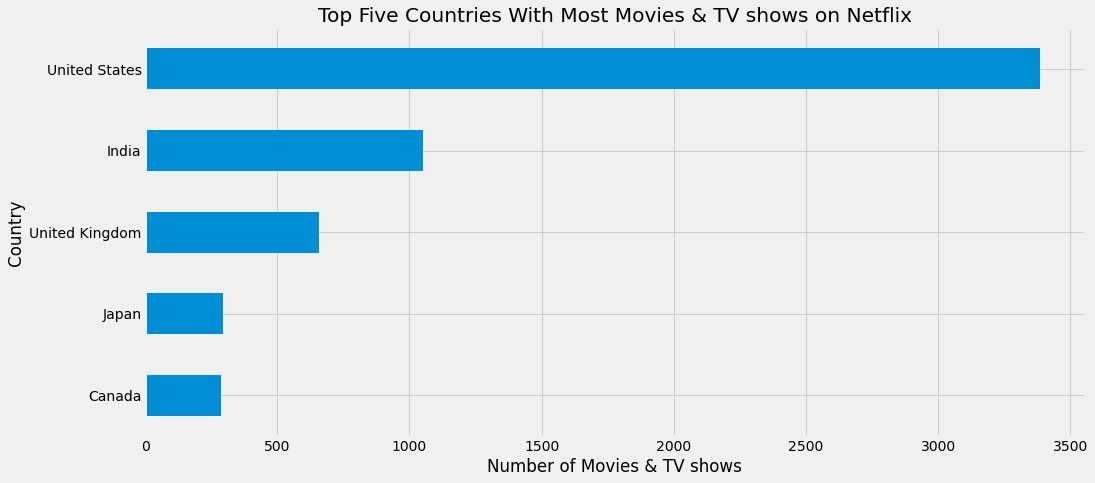

In [ ]:
# Set the figure style and intiliaze a new figure
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,7))

# Create a horizontal bar chart of top five countries with most content on Netflix
nfx_df['country'].value_counts().head().sort_values().plot(kind='barh')

# Create title and axes labels
plt.title("Top Five Countries With Most Movies & TV shows on Netflix")
plt.xlabel("Number of Movies & TV shows")
plt.ylabel("Country")

# Show plot
plt.show()

 It's clear that United States leads significantly with most content available on Netflix followed by India.

#### Exploring By Type

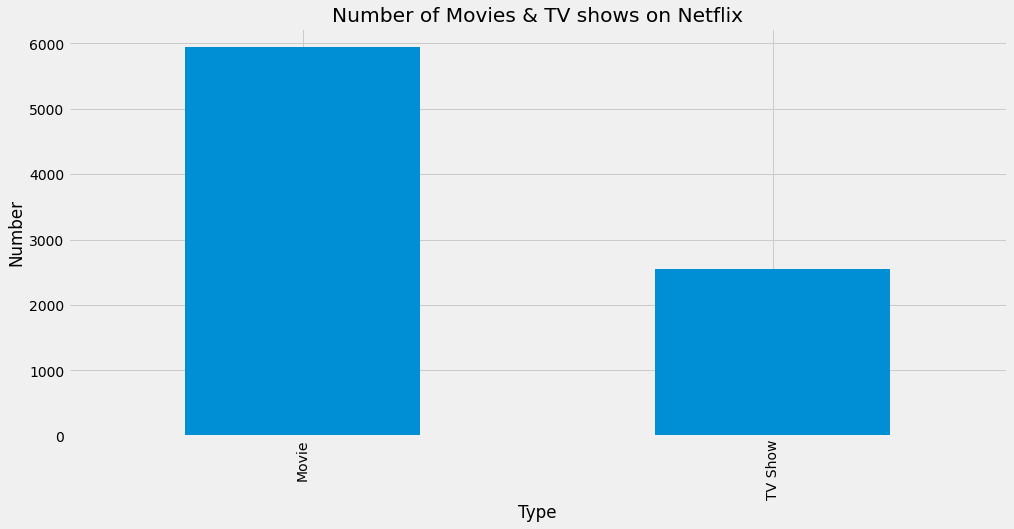

In [ ]:
# Intialize figure 
plt.figure(figsize=(15,7))

# Create a bar plot of number of available content based on TV shows and Movies
nfx_df['type'].value_counts().plot(kind='bar')

# Create title and axes labels
plt.xlabel("Type")
plt.ylabel("Number")
plt.title("Number of Movies & TV shows on Netflix")

# Show plot
plt.show()

#### Discovering Most Movie and TV shows Genre Available on Netflix

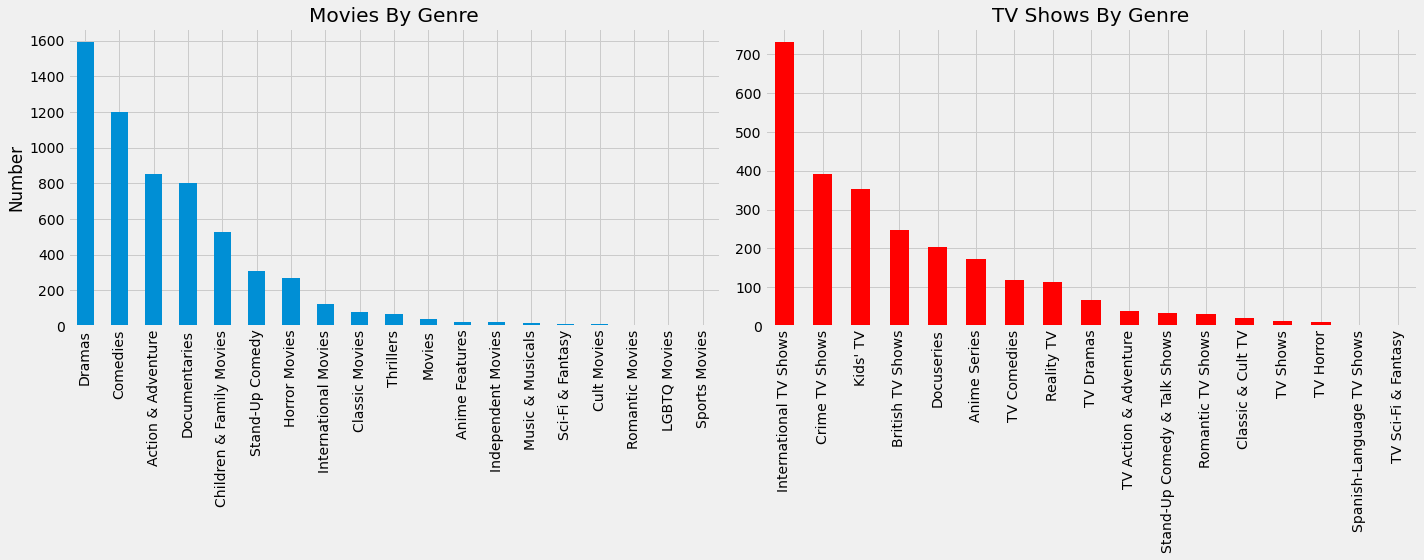

In [ ]:
# Dataframe of movies only
nfx_movie = nfx_df[nfx_df['type']=='Movie']

# Dataframe of TV shows only
nfx_show = nfx_df[nfx_df['type']=='TV Show']

# Creating Two Subplots
fig,ax = plt.subplots(1,2,figsize=(20,8))

# First Plot for movies by genre
nfx_movie['listed_in'].value_counts().plot(kind='bar',label = 'movie',ax=ax[0])

# Second Plot for TV shows by genre
nfx_show['listed_in'].value_counts().plot(kind='bar',label = 'show',ax=ax[1],color='red')

# Creating axes labels
ax[0].set_title("Movies By Genre")
ax[0].set_ylabel("Number")
ax[1].set_title("TV Shows By Genre")
plt.tight_layout()

# Show plot
plt.show()

 Drama movies are the most famous gerne on Netflix oppsoed to series where TV Dramas come in the ninth position. Despite International TV show genre being most available on Netflix, these shows have sub-genres as we can discover the most actual available genres on Netflix 

#### More About Netflix Movies

In [ ]:
# Convert duration column from object to integer
nfx_movie.loc[:,'duration'] = nfx_movie['duration'].astype(int)
# Summary statistics
nfx_movie['duration'].describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


count    5946.000000
mean      100.410024
std        27.552248
min         3.000000
25%        88.000000
50%        99.000000
75%       115.000000
max       312.000000
Name: duration, dtype: float64

In [ ]:
# Number of Movies Less than 1 hour
nb_movies_less_hour = nfx_movie[nfx_movie['duration']<60].shape[0]
nb_movies_less_hour

403

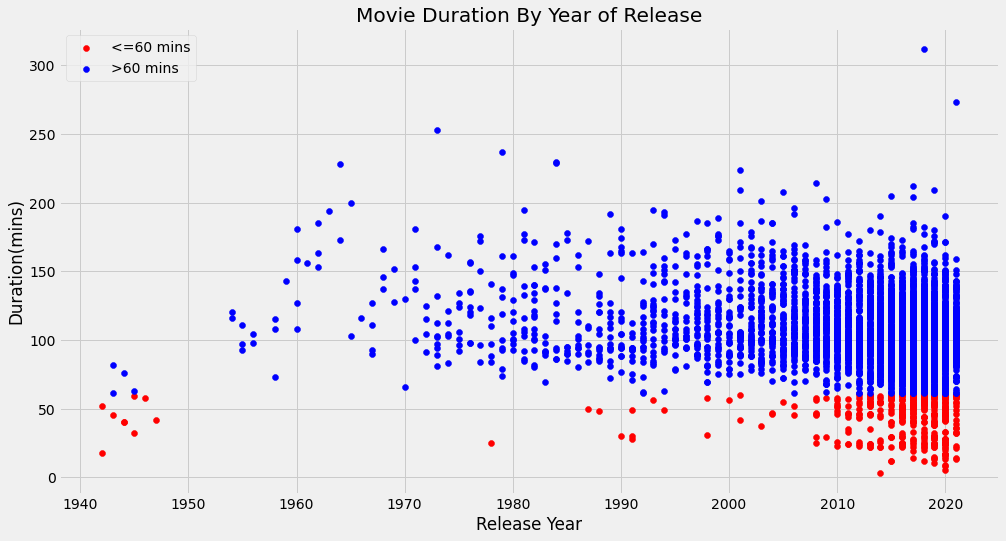

In [ ]:
# Dataframe of movies with duration less than or equal to 1 hour

movie_less_than_hr = nfx_movie[nfx_movie['duration']<=60]

# Dataframe of movies with duration more than 1 hour
movie_more_than_hr = nfx_movie[nfx_movie['duration']>60]

# Intialize a new figure
plt.figure(figsize=(15,8))

# Create a scatter plot of duration of movies versus release year
plt.scatter(movie_less_than_hr['release_year'],movie_less_than_hr['duration'],c="red",label="<=60 mins")
plt.scatter(movie_more_than_hr['release_year'],movie_more_than_hr['duration'],c="blue",label=">60 mins")

# Create title and axes labels
plt.title("Movie Duration By Year of Release")
plt.xlabel("Release Year")
plt.ylabel("Duration(mins)")

# Show legend
plt.legend(loc = 2)

# Show plot
plt.show()

#### Duration of movies were shorter than 1 hour between 1940s and 1950s, but then started to increase from the mid 1950s. Back then, there was no trend as most movies remained in a range between 90 mins and 150 mins.

#### Pivot Table

In [ ]:
nfx_movie_pt = nfx_movie.pivot_table(index="rating",columns="listed_in",values="duration")
nfx_movie_pt

listed_in,Action & Adventure,Anime Features,Children & Family Movies,Classic Movies,Comedies,Cult Movies,Documentaries,Dramas,Horror Movies,Independent Movies,International Movies,LGBTQ Movies,Movies,Music & Musicals,Romantic Movies,Sci-Fi & Fantasy,Sports Movies,Stand-Up Comedy,Thrillers
rating,,,,,,,,,,,,,,,,,,,
G,98.000000,NaN,82.636364,149.250000,NaN,NaN,93.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NC-17,NaN,NaN,NaN,NaN,97.500000,NaN,NaN,180.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NR,115.777778,NaN,NaN,102.000000,91.769231,84.000000,86.909091,103.055556,89.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.200000,NaN
PG,105.937500,91.500000,96.134831,119.600000,100.611111,96.000000,87.764706,104.806452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PG-13,113.074324,109.500000,94.500000,127.833333,101.865079,NaN,94.030303,114.592308,94.928571,NaN,NaN,NaN,NaN,NaN,NaN,113.333333,NaN,101.000000,113.250000
R,106.886364,NaN,NaN,126.250000,100.317241,101.777778,99.923077,113.862903,94.647059,99.0,101.833333,99.0,92.000000,93.000000,NaN,99.000000,NaN,89.571429,105.533333
TV-14,124.893720,70.666667,100.333333,107.105263,115.961039,134.000000,81.609524,117.414692,103.705882,97.0,112.857143,NaN,40.000000,86.000000,85.0,98.500000,NaN,67.041667,88.900000
TV-G,NaN,87.000000,82.212766,NaN,102.166667,NaN,67.179487,106.750000,NaN,NaN,94.428571,NaN,53.000000,84.000000,84.0,NaN,NaN,54.666667,NaN
TV-MA,108.255000,42.000000,116.000000,105.000000,100.130653,NaN,88.544554,106.128664,99.029851,100.0,105.781818,NaN,65.000000,90.555556,81.0,103.666667,NaN,66.380228,92.428571


In [ ]:
nfx_movie_pt.max(axis="columns").sort_values(ascending=False)

rating
NC-17       180.000000
G           149.250000
TV-14       134.000000
PG-13       127.833333
TV-Y7       127.000000
R           126.250000
TV-PG       123.083333
PG          119.600000
TV-MA       116.000000
NR          115.777778
UR          113.000000
TV-G        106.750000
TV-Y7-FV     76.666667
TV-Y         52.243902
dtype: float64

In [ ]:

nfx_movie_pt.max(axis="index").sort_values(ascending=False)

listed_in
Dramas                      180.000000
Classic Movies              149.250000
Cult Movies                 134.000000
Action & Adventure          124.893720
International Movies        123.083333
Children & Family Movies    116.000000
Comedies                    115.961039
Sci-Fi & Fantasy            113.333333
Thrillers                   113.250000
Anime Features              109.500000
Horror Movies               103.705882
Stand-Up Comedy             101.000000
Independent Movies          100.000000
Documentaries                99.923077
LGBTQ Movies                 99.000000
Music & Musicals             93.000000
Movies                       92.000000
Sports Movies                87.000000
Romantic Movies              85.000000
dtype: float64

Drama movies rated **NC-17** (No Children Under 17) are the longest movies on average. The relationship between Drama movies and  NC-17 ratings is clear as some include explicit content. However, as Drama movies are the longest, it requires more details to discover why.

## Conclusion

Although drama movies and TV Shows are the most available content on Netflix, Netflix targets a niche market for customers with specific preferences. Significant variation of shows of different genres and country origins made Netflix successful in recent years and reached out to more regions.

# Part II Manipulating Dataframes

## First Function

In [ ]:
def append_randint_col(df):
  """ Add a column named "RandInt" to df and fill its row values
      with random integers from 1 to 100.
  Args:
      df : dataframe
  Returns:
      df with additional RandInt column
  """
  df['RandInt'] = None
  for i in range(len(df)):
    df.loc[i,'RandInt'] = np.random.randint(1,100)
  return df

In [ ]:
df1 = append_randint_col(nfx_df)

In [ ]:
df1.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,RandInt
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90,Documentaries,11
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,80
2,s3,TV Show,Ganglands,France,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,46
3,s4,TV Show,Jailbirds New Orleans,United States,2021-09-24,2021,TV-MA,1 Season,Docuseries,21
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,59


## Second Function

In [ ]:
def split_even_odd(df):

  """ Split the dataframe into two dataframes of same size based on 'RandInt' column parity.

  Args:
    df : dataframe
  
  Returns:
    two dataframes of the same size, the first containing all rows where the RandInt value is even
    and the second containing all rows where the RandInt value is odd.
  """

  if 'RandInt' in df.columns:
    df1 = df.loc[df['RandInt']%2==0,:]
    df2 = df.loc[df['RandInt']%2!=0,:]

    # Return Dataframes of same size
    if len(df1) >= len(df2):
      df1 = df1.sample(n=len(df2)).reset_index(drop=True)
      df2.reset_index(inplace=True,drop=True)
    else:
      df2 = df2.sample(n=len(df1)).reset_index(drop=True)
      df1.reset_index(inplace=True,drop=True)
  
  else:
    raise KeyError("Column 'RandInt' is not found")
  return (df1,df2)


In [ ]:
# Apply Function
df2_even,df3_odd = split_even_odd(nfx_df)

In [ ]:
# Check if all values of RandInt in df2_even are even
(df2_even['RandInt']%2==0).all()

True

In [ ]:
# Check if all values of RandInt in df3_odd are odd
(df3_odd['RandInt']%2!=0).all()

True

## Third Function

In [ ]:
def split_80_20_percent(df):
  """ Split the dataframe into two parts, one containg 80% of rows and the second contains the remaining 20%

  Args:
      df : a dataframe with a RandInt column

  Returns:
    two dataframes split randomly, the first containing 80% of the rows and the second the remaining 20%.
  """

  df1 = df.sample(frac=0.8)
  df2 = df.drop(df1.index)
  df1.reset_index(drop=True,inplace=True)
  df2.reset_index(drop=True,inplace=True) 
  return (df1,df2)
 


In [ ]:
# Apply function
df3_80,df3_20 = split_80_20_percent(df1)

In [ ]:
# Check if both dataframes contain different rowss
df3_20['show_id'].isin(df3_80['show_id']).any()

False

There is no common row between the two splitted dataframes

In [ ]:
# Apply the split_80_20 function on nfx_movie df
nfx_movie.reset_index(drop=True,inplace=True)
movie_80,movie_20 = split_80_20_percent(nfx_movie)

In [ ]:
movie_80['show_id'].isin(movie_20['show_id']).any()

False

In [ ]:
movie_80.describe()

,release_year,duration
count,4757.000000,4757.000000
mean,2013.015976,100.402144
std,9.679654,27.291813
min,1942.000000,3.000000
25%,2012.000000,88.000000
50%,2016.000000,99.000000
75%,2018.000000,115.000000
max,2021.000000,312.000000


In [ ]:
movie_20.describe()

,release_year,duration
count,1189.000000,1189.000000
mean,2012.914214,100.441548
std,10.137740,28.582258
min,1943.000000,9.000000
25%,2012.000000,87.000000
50%,2016.000000,99.000000
75%,2018.000000,116.000000
max,2021.000000,214.000000


The summary statistics of the splitted dataframe (80,20) and the original dataframe are approximately the same having almost same mean,standard deviation, and quartiles.